# In this project, we analyze and forecast daily minimum temperature data using classical time series techniques in Python.
The dataset is available at - https://www.kaggle.com/datasets/paulbrabban/daily-minimum-temperatures-in-melbourne

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/time_series/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')

In [3]:
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.shape

(3650, 2)

In [5]:
df.describe()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
count,3650,3650
unique,3650,230
top,1981-01-01,11.0
freq,1,51


In [6]:
df.dtypes

Date                                                             object
Daily minimum temperatures in Melbourne, Australia, 1981-1990    object
dtype: object

### To perform effective time series analysis, we first prepare the dataset by:

- bConverting the Date column to a proper datetime type, enabling time-based indexing, slicing, resampling, and other temporal operations.
- Converting the Temperature column to a numeric (float) type, which is required for mathematical operations, statistical modeling, plotting, and time series algorithms.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [8]:
# Rename column for consistency
df.columns = ['Temperature']

In [9]:
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [10]:
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

#### Checking for Null Valuse

In [11]:
df.isna().sum()

Temperature    3
dtype: int64

In [12]:
df.dropna(inplace= True)

###  Visualization to gain some insights

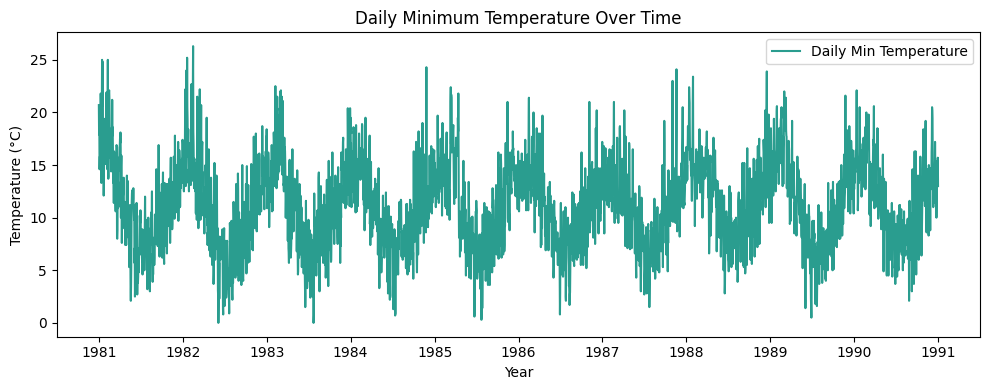

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Temperature'], 
         color='#2A9D8F', label='Daily Min Temperature')

plt.title("Daily Minimum Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
df['Rolling_Mean'] = df['Temperature'].rolling(window=30).mean()
df['Rolling_Std'] = df['Temperature'].rolling(window=30).std()

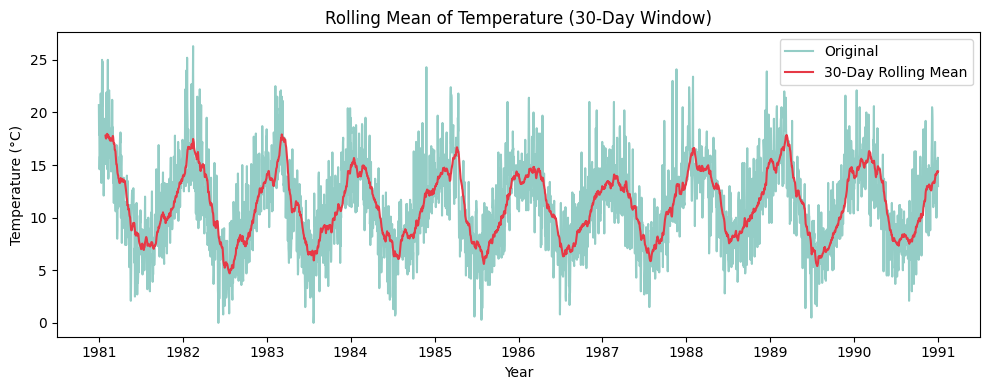

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df['Temperature'], 
         color='#2A9D8F', alpha=0.5, label='Original')
plt.plot(df['Rolling_Mean'], 
         color='#E63946', label='30-Day Rolling Mean')

plt.title("Rolling Mean of Temperature (30-Day Window)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


#### Separate the time series into:
- Trend
- Seasonal
- Residual components

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
decomposition = seasonal_decompose(
    df['Temperature'], model='additive', period=365
)

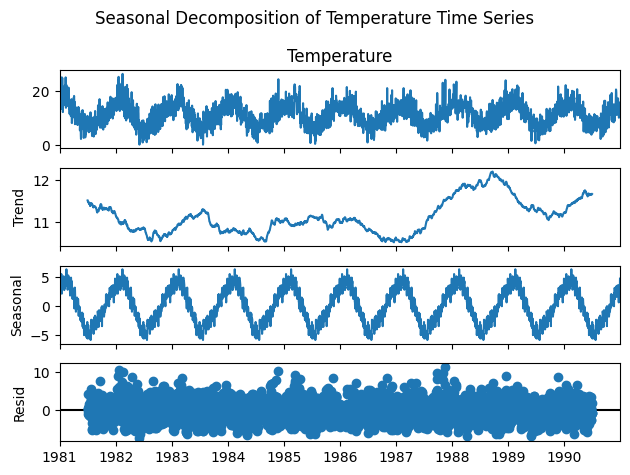

In [18]:
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Temperature Time Series")
plt.tight_layout()
plt.show()

### Train-Test split
##### All the data before 1988 are kept int the train set, the rest are in the test set

In [19]:
train = df[:'1988']
test = df['1989':]

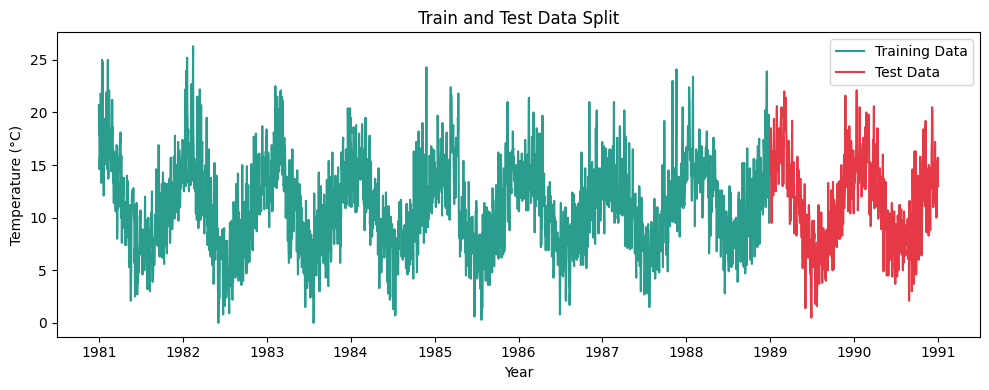

In [20]:
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Temperature'], 
         color='#2A9D8F', label='Training Data')
plt.plot(test.index, test['Temperature'], 
         color='#E63946', label='Test Data')

plt.title("Train and Test Data Split")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


### Model Trainign : ARIMA

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model = ARIMA(train['Temperature'], order=(5,1,0))
model_fit = model.fit()

C:\Users\ict\anaconda3\envs\nlp-dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ict\anaconda3\envs\nlp-dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ict\anaconda3\envs\nlp-dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
forecast = model_fit.forecast(steps=len(test))

C:\Users\ict\anaconda3\envs\nlp-dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ict\anaconda3\envs\nlp-dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


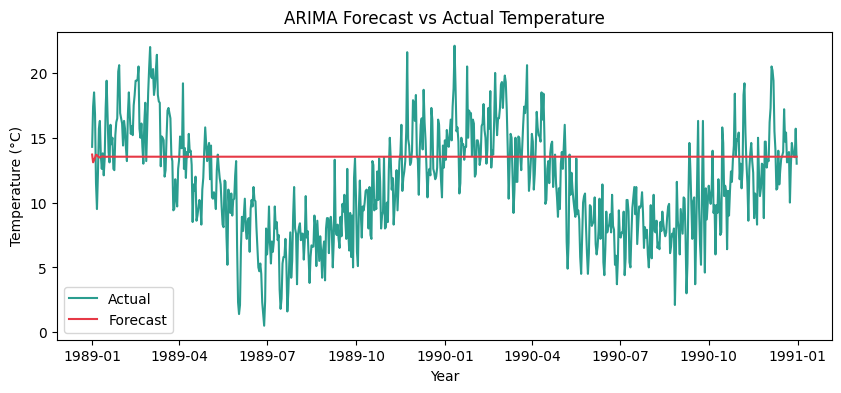

In [24]:
plt.figure(figsize=(10,4))
plt.plot(test.index, test['Temperature'], 
         color='#2A9D8F', label='Actual')
plt.plot(test.index, forecast, 
         color='#E63946', label='Forecast')

plt.title("ARIMA Forecast vs Actual Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


### Evaluation : Root Mean Squared Error

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
rmse = np.sqrt(mean_squared_error(test['Temperature'], forecast))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.5986932916559615


### Results and Discussion
- The dataset showed clear seasonal behavior
- Rolling mean successfully smoothed the temperature series
- ARIMA captured the general trend but struggled with extreme fluctuations
- Forecast accuracy was acceptable for a baseline model